In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from time import strptime

In [2]:
df = pd.read_csv("/Users/isky/Documents/GitHub/hackathon-season2/playground/dev_club.csv")

In [12]:
df.columns = df.columns.str.lower()
df['position'] = df['position'].str.lower()
df['dept'] = df['dept'].str.lower()
df['gender'] = df['gender'].replace(0, 'male').replace(1, "female")
df['hired_year'] = df['hired'].map(lambda x: datetime.strptime(x,'%Y-%m-%d').year)
df['hired_dt'] = df['hired'].map(lambda x: datetime.strptime(x,'%Y-%m-%d'))

In [13]:
df

,empid,passport,firstname,lastname,gender,birthday,nationality,hired,dept,position,status,region,age,hired_age,hired_year,hired_dt
0,3,JUI65YBK7AF,Jada,Bender,male,1963-05-28,Pakistan,2001-02-11,pilot,pilot,1,Canada,59,21,2001,2001-02-11
1,5,AZE20CSG4MU,Lillian,Reese,male,1982-12-03,Ukraine,2002-05-19,flight planning,steward,1,Canada,39,20,2002,2002-05-19
2,23,NFH65BYM0VB,Armand,Horn,male,1987-05-24,Netherlands,2007-06-19,aircraft maintenance,airhostess,1,Ocenia,35,15,2007,2007-06-19
3,29,CMK62UAD3VK,Rowan,Leonard,female,1974-07-15,Germany,2004-03-27,aircraft maintenance,pilot,1,Ocenia,48,18,2004,2004-03-27
4,33,EWD45RJW5YK,Carter,Velasquez,male,1967-11-23,Indonesia,2005-02-27,flight planning,pilot,1,APAC,54,17,2005,2005-02-27
5,34,BFS82MEY3CX,Selma,Bush,male,1972-03-26,Italy,2008-10-10,flight attendance,airhostess,1,USA,50,13,2008,2008-10-10
6,50,MRC33GHJ2KW,Calvin,Roach,female,1999-04-16,Mexico,2011-03-18,flight attendance,steward,1,Europe,23,11,2011,2011-03-18
7,66,WKV12UQC6QF,Zachery,Valentine,male,1971-06-04,Philippines,2011-08-25,flight attendance,steward,1,Middle East,51,11,2011,2011-08-25
8,80,EUC74ENE9ZK,Ryan,Rush,male,1998-06-13,Italy,2019-07-31,aircraft maintenance,pilot,1,Middle East,24,3,2019,2019-07-31
9,93,UXL43IOW6OV,Honorato,Maxwell,female,1982-03-09,France,2017-02-04,aircraft maintenance,airhostess,1,Europe,40,5,2017,2017-02-04


In [14]:
def calculate_year(str_date):
    date = datetime.strptime(str_date,'%Y-%m-%d')
    today = datetime.today()
    return today.year - date.year - ((today.month, today.day) < (date.month, date.day))

In [15]:
df['age'] = df['birthday'].map(calculate_year)
df['hired_age'] = df['hired'].map(calculate_year)

<AxesSubplot: ylabel='status'>

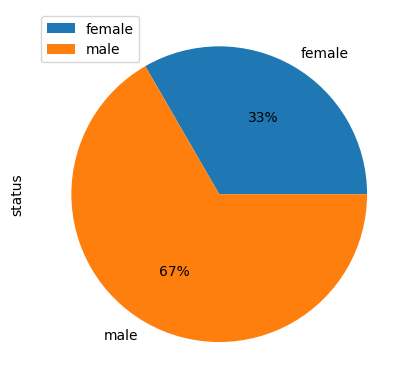

In [16]:
df.groupby(['gender']).sum().plot(
	kind='pie', y='status', autopct='%1.0f%%')


In [17]:
df_sum_hired_year = df.groupby(['hired_year'])['hired_year'].count().reset_index(name="count")

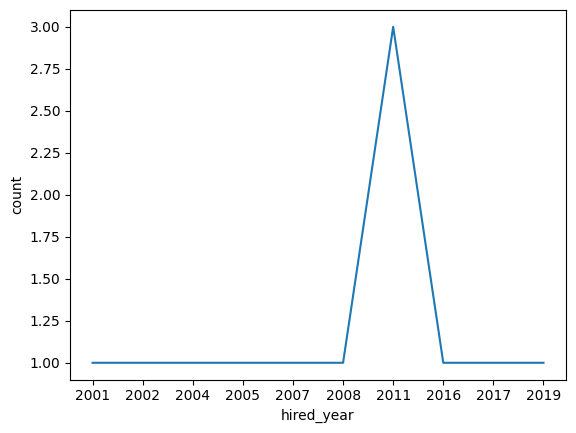

In [22]:
plt.plot(df_sum_hired_year['hired_year'].astype(str),df_sum_hired_year['count'])
plt.xlabel('hired_year')
plt.ylabel('count')
plt.show()
